In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# 解决画图乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [6]:
# 导入数据 
# 由于该文件是ANSI编码 encoding的值设置为GBK
df = pd.read_csv('../数据/car_info_sss.csv', encoding='GBK')

In [7]:
df.head()

,car_brand,style_year,other_info,buy_year,total_km,location,total_price,original_price,brand_tag,engine_displacement,province_id,province_name,product_year,year_difference,Value_retention
0,马自达 阿特兹,2018款,2.5L 蓝天尊崇版,2018,1.0,西安,19.47,23.5,马自达,2.5,27,陕西省,2018,0,0.8285
1,长安商用 欧力威,2013款,1.2L 手动舒适型,2018,12.3,西宁,1.95,4.7,长安,1.2,29,青海省,2013,5,0.4149
2,保时捷Cayenne,2016款,Cayenne 3.0T,2018,3.8,哈尔滨,75.00,96.4,保时捷,3.0,8,黑龙江省,2016,2,0.7780
3,别克 凯越,2011款,1.6LE-MT,2018,11.5,成都,2.68,11.7,别克,1.6,23,四川省,2011,7,0.2291
4,大众 夏朗,2016款,380TSI 舒享型 7座(进口),2018,5.6,广州,19.00,32.1,大众,380.0,19,广东省,2016,2,0.5919


In [8]:
# 统计各省二手车交易数量
rank = df['province_name'].value_counts()

In [9]:
# 前十交易量的省份
rank.head(10)

province_name
广东省    41981
江苏省    39142
山东省    38699
浙江省    27196
四川省    22145
辽宁省    19532
湖北省    18652
河北省    18643
河南省    18335
安徽省    17079
Name: count, dtype: int64

<Axes: ylabel='交易量百分比'>

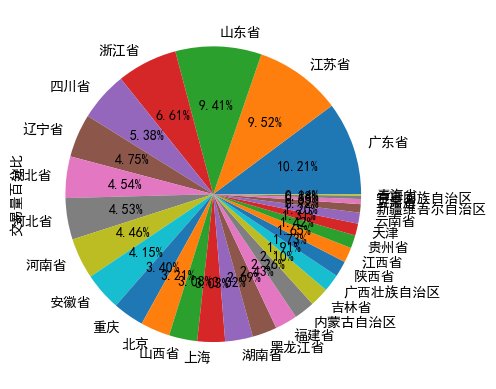

In [10]:
# 绘制交易量饼图
rank.plot(
    kind='pie',
    ylabel = '交易量百分比',
    autopct = '%1.2f%%'
)

In [11]:
# 导出各省交易量数据
province_rank_df = pd.DataFrame(rank)
province_rank_df.to_csv('../数据/province_rank_df.csv', encoding='UTF-8')

In [12]:
# 获取各品牌的保值率平均值表

# 1.利用set集合将各品牌提取出
# set集合可以自动去除重复项
brand_set = set(df['brand_tag'])

In [15]:
# 2. 计算各品牌5年、10年 保值率平均值

# 新建mean_value_df
# brand --> 品牌
# value_rate_avg --> 平均保值率
# five_year_rate --> 五年平均保值率
# ten_year_rate --> 十年平均保值率
# five_counts --> 该品牌五年的数量
# ten_counts --> 该品牌十年的数量
# counts --> 该品牌总数量
mean_value_df = pd.DataFrame(
    columns=['brand', 'value_rate_avg', 'five_year_rate', 
             'ten_year_rate', 'five_counts', 'ten_counts',
             'counts']
)

# 遍历各品牌进行计算
for brand in tqdm(brand_set):
    
    # 计算该品牌平均保值率
    avg_rate = df.loc[df['brand_tag'] == brand]['Value_retention'].mean()

    # 计算该品牌五年保值率
    avg_rate_five = df.loc[(df['brand_tag'] == brand) & (df['year_difference'] == 5)]['Value_retention'].mean()

    # 计算该品牌十年保值率
    avg_rate_ten = df.loc[(df['brand_tag'] == brand) & (df['year_difference'] == 10)]['Value_retention'].mean()

    # 计算该品牌五年数量
    brand_counts_five = df.loc[(df['brand_tag'] == brand) & (df['year_difference'] == 5)]['Value_retention'].count()

    # 计算该品牌十年数量
    brand_counts_ten = df.loc[(df['brand_tag'] == brand) & (df['year_difference'] == 10)]['Value_retention'].count()
    
    # 计算该品牌数量
    brand_counts = df.loc[df['brand_tag'] == brand]['Value_retention'].count()
    
    # 添加到mean_value_df中
    # 其中保值率保留4位小数
    mean_value_df.loc[len(mean_value_df)] = [brand, round(avg_rate, 4), round(avg_rate_five, 4),
                                             round(avg_rate_ten, 4), brand_counts_five, brand_counts_ten,
                                             brand_counts]

# 3.导出数据 将编码设置为utf-8
mean_value_df.to_csv('../数据/mean_value_df.csv', encoding='UTF-8', index=False)


  0%|          | 0/94 [00:00<?, ?it/s]

100%|██████████| 94/94 [00:14<00:00,  6.40it/s]


In [ ]:
mean_value_df.head()

,brand,value_rate_avg,five_year_rate,ten_year_rate,five_counts,ten_counts,counts
0,五菱,0.5042,0.4943,0.2201,1125,156,8300
1,华颂,0.4926,NaN,NaN,0,0,35
2,凯翼,0.5876,NaN,NaN,0,0,229
3,宝骏,0.6395,0.4159,NaN,191,0,4485
4,法拉利,0.6363,0.6358,NaN,4,0,21


<Axes: xlabel='品牌', ylabel='保值率平均值'>

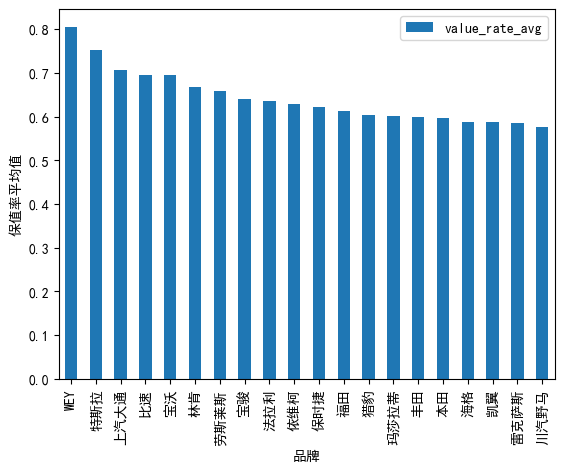

In [16]:
# 总保值率 Top20
top20_rate = mean_value_df.sort_values(by='value_rate_avg', ascending=False).head(20)

# 绘制Top20条形图
top20_rate.plot(
    kind = 'bar',
    x = 'brand',
    y = 'value_rate_avg',
    xlabel = '品牌',
    ylabel = '保值率平均值'
)

<Axes: xlabel='品牌', ylabel='五年保值率平均值'>

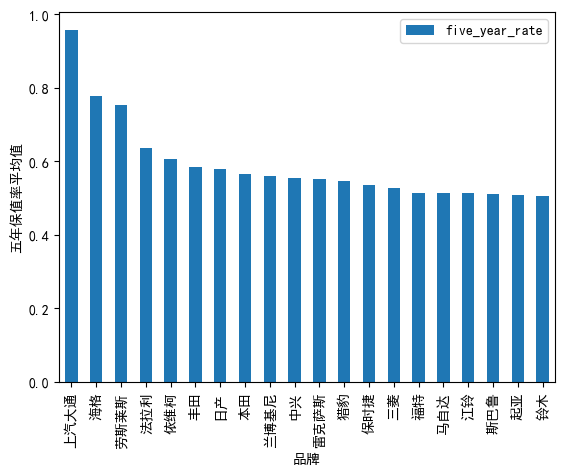

In [17]:
# 五年保值率Top20
five_top20_rate = mean_value_df.sort_values(by='five_year_rate', ascending=False).head(20)


# 绘制五年保值率Top20条形图
five_top20_rate.plot(
    kind = 'bar',
    x = 'brand',
    y = 'five_year_rate',
    xlabel = '品牌',
    ylabel = '五年保值率平均值'
)

<Axes: xlabel='品牌', ylabel='十年保值率平均值'>

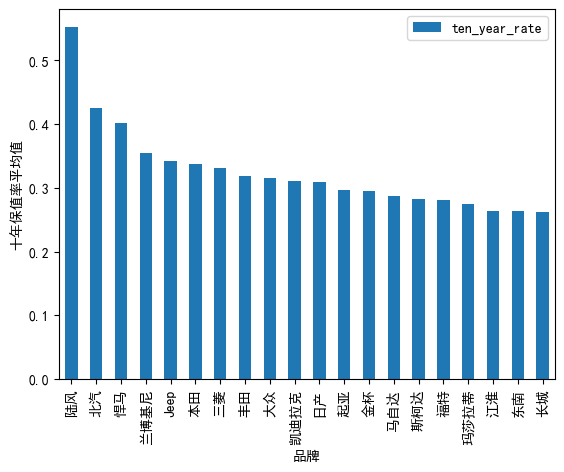

In [18]:
# 十年保值率Top20
ten_top20_rate = mean_value_df.sort_values(by='ten_year_rate', ascending=False).head(20)


# 绘制十年保值率Top20条形图
ten_top20_rate.plot(
    kind = 'bar',
    x = 'brand',
    y = 'ten_year_rate',
    xlabel = '品牌',
    ylabel = '十年保值率平均值'
)